<a href="https://colab.research.google.com/github/veyselalevcan/Time_Series/blob/main/ARIMA_Example2(NASDAQ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install evds --upgrade

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
veri= yf.download('^IXIC', period='20Y', interval='1mo')['Adj Close']
veri= pd.DataFrame(veri)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
veri.rename(columns={'Adj Close': 'Endeks'}, inplace=True)
veri.rename_axis('Tarih', inplace=True)
veri

,Endeks
Tarih,
2003-12-01,2003.369995
2004-01-01,2066.149902
2004-02-01,2029.819946
2004-03-01,1994.219971
2004-04-01,1920.150024
...,...
2023-07-01,14346.019531
2023-08-01,14034.969727
2023-09-01,13219.320312


In [ ]:
veri.isnull().sum()

Endeks    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt


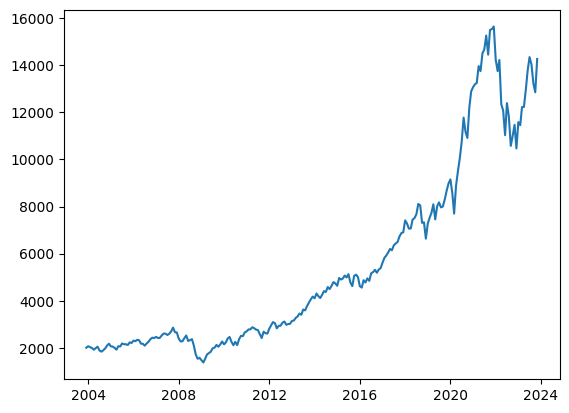

In [ ]:
plt.plot(veri)

In [ ]:
verion= veri.iloc[:-15]
verison= veri.iloc[-15:]
verison

,Endeks
Tarih,
2022-09-01,10575.620117
2022-10-01,10988.150391
2022-11-01,11468.000000
2022-12-01,10466.480469
2023-01-01,11584.549805
2023-02-01,11455.540039
2023-03-01,12221.910156
2023-04-01,12226.580078
2023-05-01,12935.290039


#Mevsimsellik



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, month_plot, plot_pacf

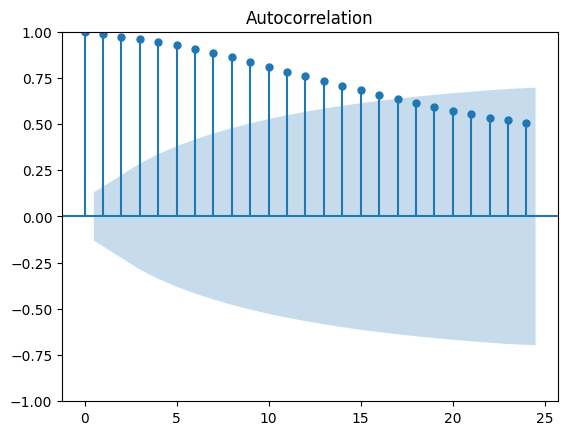

In [ ]:
acf= plot_acf(verion)


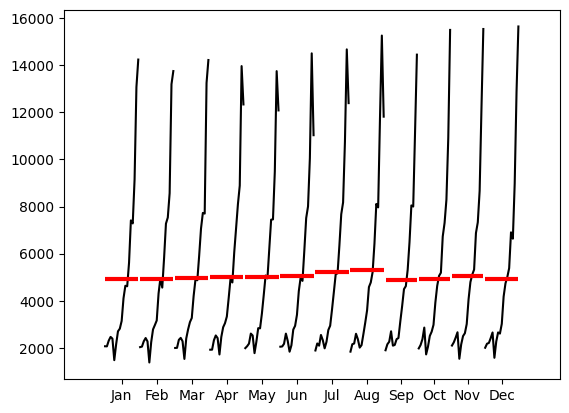

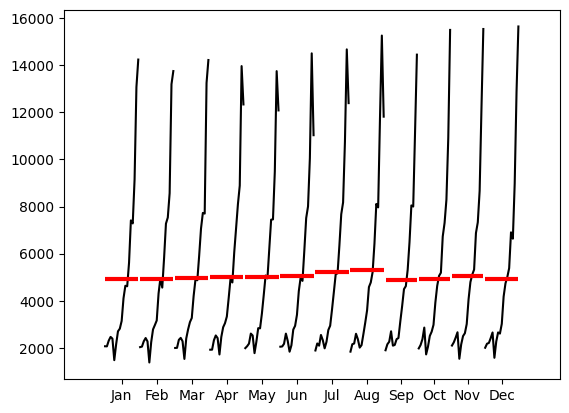

In [ ]:
month_plot(verion)

#Duraganlık

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.7 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import ADF, KPSS

In [ ]:
adf=ADF(verion)
kpss=KPSS(verion)
adf,kpss

(<class 'arch.unitroot.unitroot.ADF'>
 """
    Augmented Dickey-Fuller Results   
 Test Statistic                 -0.807
 P-value                         0.817
 Lags                                7
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 <class 'arch.unitroot.unitroot.KPSS'>
 """
     KPSS Stationarity Test Results   
 Test Statistic                  1.865
 P-value                         0.000
 Lags                                9
 -------------------------------------
 
 Trend: Constant
 Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
 Null Hypothesis: The process is weakly stationary.
 Alternative Hypothesis: The process contains a unit root.
 """)

In [ ]:
verifark= verion.diff().dropna()
adf=ADF(verifark)
kpss=KPSS(verifark)
adf,kpss

(<class 'arch.unitroot.unitroot.ADF'>
 """
    Augmented Dickey-Fuller Results   
 Test Statistic                 -3.520
 P-value                         0.007
 Lags                                6
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 <class 'arch.unitroot.unitroot.KPSS'>
 """
     KPSS Stationarity Test Results   
 Test Statistic                  0.285
 P-value                         0.149
 Lags                                1
 -------------------------------------
 
 Trend: Constant
 Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
 Null Hypothesis: The process is weakly stationary.
 Alternative Hypothesis: The process contains a unit root.
 """)

#ARIMA Model kurma

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
model= auto_arima(verion, trace=True, seasonal=False) #Diger sonucları gormek ıcın trace true
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3256.363, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3253.756, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3254.113, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3254.374, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3255.400, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3253.314, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3254.261, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3253.893, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3254.999, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3254.059, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3255.641, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.879 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1622.657
Date:                Fri, 24 Nov 2023   AIC                           3253.314
Time:                        11:33:49   BIC                           3266.961
Sample:                    12-01-2003   HQIC                          3258.823
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     75.3834     37.139      2.030      0.042       2.593     148.174
ar.L1         -0.6975      0.135     -5.155      0.000      -0.963      -0.432
ma.L1          0.5884      0.150      3.935      0.000       0.295       0.881
sigma2      1.147e+05   5554.629     20.645      0.000    1.04e+05    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               508.78
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):              20.10   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model= auto_arima(verion, trace=True, seasonal=False, d=1)
model2= auto_arima(verion, trace=True, seasonal=False, d=2) #AIC 2 ıcın kontrol
model, model2

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3256.363, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3253.756, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3254.113, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3254.374, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3255.400, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3253.314, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3254.261, Time=0.97 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3253.893, Time=1.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3254.999, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3254.059, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3255.641, Time=0.28 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.500 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3411.562

(ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(3, 2, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False))

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(3, 2, 1)   Log Likelihood               -1617.699
Date:                Fri, 24 Nov 2023   AIC                           3245.398
Time:                        11:36:12   BIC                           3262.434
Sample:                    12-01-2003   HQIC                          3252.275
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2633      0.054     -4.902      0.000      -0.369      -0.158
ar.L2         -0.1271      0.061     -2.100      0.036      -0.246      -0.008
ar.L3         -0.2273      0.044     -5.144      0.000      -0.314      -0.141
ma.L1         -0.7738      0.040    -19.451      0.000      -0.852      -0.696
sigma2      1.159e+05   5377.381     21.558      0.000    1.05e+05    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               756.30
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              19.13   Skew:                            -1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
hata= model.resid()
hata2= model2.resid()
hata, hata2

(Tarih
 2003-12-01    1958.960693
 2004-01-01      43.549967
 2004-02-01     -93.009880
 2004-03-01     -81.993278
 2004-04-01    -126.160052
                  ...     
 2022-04-01   -1919.824884
 2022-05-01    -514.370211
 2022-06-01   -1002.016823
 2022-07-01    1141.953355
 2022-08-01    -371.869898
 Length: 225, dtype: float64,
 Tarih
 2003-12-01    2003.369995
 2004-01-01    -921.136483
 2004-02-01    -308.559897
 2004-03-01    -128.066683
 2004-04-01    -166.738305
                  ...     
 2022-04-01   -2051.800528
 2022-05-01    -245.035158
 2022-06-01    -640.895452
 2022-07-01    1380.385707
 2022-08-01      36.952575
 Length: 225, dtype: float64)

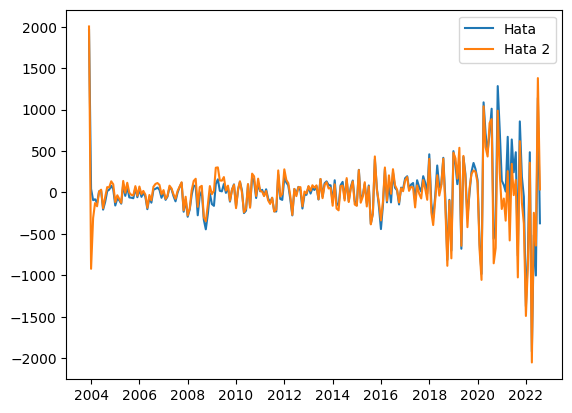

In [ ]:
plt.plot(hata, label='Hata')
plt.plot(hata2, label= 'Hata 2')
plt.legend()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
q1= acorr_ljungbox(hata)
q2= q1= acorr_ljungbox(hata2)
q1, q2

(      lb_stat  lb_pvalue
 1    0.444608   0.504907
 2    0.506067   0.776442
 3    0.789941   0.851871
 4    1.274808   0.865635
 5    1.684783   0.890811
 6    4.413958   0.620843
 7    9.027461   0.250690
 8    9.038923   0.339023
 9    9.040531   0.433541
 10  10.219249   0.421473,
       lb_stat  lb_pvalue
 1    0.444608   0.504907
 2    0.506067   0.776442
 3    0.789941   0.851871
 4    1.274808   0.865635
 5    1.684783   0.890811
 6    4.413958   0.620843
 7    9.027461   0.250690
 8    9.038923   0.339023
 9    9.040531   0.433541
 10  10.219249   0.421473)

#Hata MEtriklerine bakalım

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
tahmin1, ga1 = model.predict(15, return_conf_int= True)
tahmin1, ga1

(2022-09-01    12073.467823
 2022-10-01    11969.415344
 2022-11-01    12117.371924
 2022-12-01    12089.560356
 2023-01-01    12184.341374
 2023-02-01    12193.618037
 2023-03-01    12262.531215
 2023-04-01    12289.849858
 2023-05-01    12346.179341
 2023-06-01    12382.274703
 2023-07-01    12432.482708
 2023-08-01    12472.847603
 2023-09-01    12520.077748
 2023-10-01    12562.519603
 2023-11-01    12608.301135
 Freq: MS, dtype: float64,
 array([[11409.75635887, 12737.17928633],
        [11080.50263922, 12858.32804809],
        [11020.97571398, 13213.7681349 ],
        [10836.54917927, 13342.57153365],
        [10781.34712663, 13587.33562069],
        [10662.14295016, 13725.09312438],
        [10608.06574172, 13916.99668903],
        [10523.8567732 , 14055.84294299],
        [10473.36824857, 14218.99043284],
        [10409.69457273, 14354.85483337],
        [10364.0934063 , 14500.87201025],
        [10313.46209344, 14632.23311183],
        [10272.99841074, 14767.15708466],
       

In [ ]:
tahmin2, ga2 = model2.predict(15, return_conf_int= True)
tahmin2, ga2

(2022-09-01    11597.680823
 2022-10-01    10982.712567
 2022-11-01    10867.060485
 2022-12-01    10589.434480
 2023-01-01    10381.099090
 2023-02-01    10061.606083
 2023-03-01     9799.388646
 2023-04-01     9520.471759
 2023-05-01     9263.939055
 2023-06-01     8990.616254
 2023-07-01     8722.664321
 2023-08-01     8450.344352
 2023-09-01     8182.308349
 2023-10-01     7912.478890
 2023-11-01     7643.569957
 Freq: MS, dtype: float64,
 array([[10930.35653051, 12265.00511485],
        [10056.31866504, 11909.10646935],
        [ 9696.73247791, 12037.38849173],
        [ 9226.55012782, 11952.31883179],
        [ 8774.80071215, 11987.39746812],
        [ 8197.06643036, 11926.14573602],
        [ 7656.20957556, 11942.56771637],
        [ 7096.73873309, 11944.20478423],
        [ 6547.2720406 , 11980.60606973],
        [ 5970.93611301, 12010.29639478],
        [ 5387.42935677, 12057.89928498],
        [ 4790.01537296, 12110.67333064],
        [ 4186.92524456, 12177.69145427],
       

In [ ]:
rmse1= np.sqrt(mean_squared_error(verison, tahmin1))
rmse2= np.sqrt(mean_squared_error(verison, tahmin2))
rmse1, rmse2

(1123.0076959694873, 3749.8845419797867)

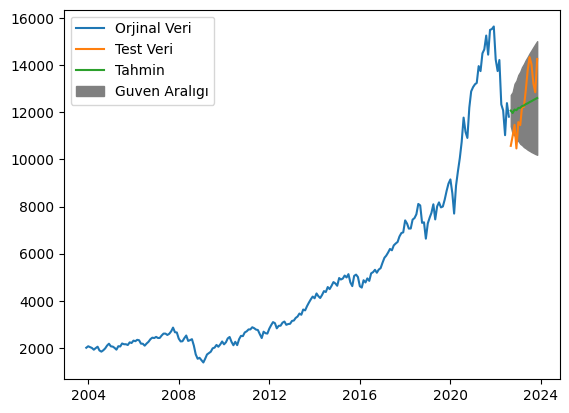

In [ ]:
plt.plot(verion, label= 'Orjinal Veri')
plt.plot(verison, label= 'Test Veri')
plt.plot(tahmin1, label= 'Tahmin')
plt.fill_between(tahmin1.index, ga1[:,0], ga1[:,1], color= 'Gray', label='Guven Aralıgı')
plt.legend(loc='upper left')